<a href="https://colab.research.google.com/github/jaleftwi/MAT421_Modules/blob/main/MAT421_ModuleB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module B**

---
This section will cover the second half of Module B of MAT 421. Continuing on the topic of interpolation- the following lessons will be covered:

*   17.4 Lagrange Polynomial Interpolation
*   17.5 Newton Polynomial Interpolation

## **Section 17.4 Lagrange Polynomial Interpolation**
---
While using a piecewise polynomial function approach has its advantages, it can become cumbersome as the number of cubic polynomial function increase per data point. Another common approach to interpolation is the Lagrange polynomial process- in which a single polynomial used to model the function.

This polynomial- dubbed the Lagrange polynomial L(x)- goes through every data point. To obtain the Lagrange polynomial, it is useful to map L(x) as a linear combination of Lagrange basis polynomials P(x).

P(x) = ∏((x-xother)/(xindex - xother))

L(x) = ∑(yindex*P(xindex))

This process can become much simpler through the use of computers, as shown in the computer code below:

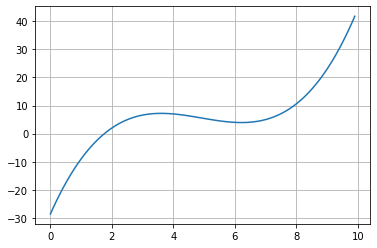

In [5]:
# Lagrange Process Using 'scipy'
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

# Defining data points
x = [2, 4, 6, 7]
y = [2, 7, 4, 5]
x_new = np.arange(0, 10, 0.1)

# Defining function f
f = lagrange(x, y)        

# Plotting function f
plt.plot(x_new, f(x_new))
plt.grid()
plt.show()

**Homework Question**:*Write a function my_lagrange(x, y, X), where the output Y is the Lagrange interpolation of the data points contained in x and y computed at X. Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don’t use the existing lagrange function from scipy.*

In [20]:
def my_lagrange(x, y, estX):
  import math
  estY = 0
  count = len(x) -1

  # Outer Loop computes the sum for Langrange Polynomial L(x) = y1*P1 + y2*P2 + ...
  for index in range(0,count):
    
    basis = 1
    # Inner Loop to compute the product for Langrange Basis Polynomials Pi(x) = (((x-xother)/(xindex - xother))) 
    for data in x:
      if (data != x[index]):                                  # Check to see if x values differ
        basis = basis * ((estX - data) / (x[index] - data))   # Product of all Pi

    # End Inner For loop
    estY = estY + y[index]*basis    # Summation to find L(X)

  #End Outer For loop
  return estY

Test Cases as given by the HW:

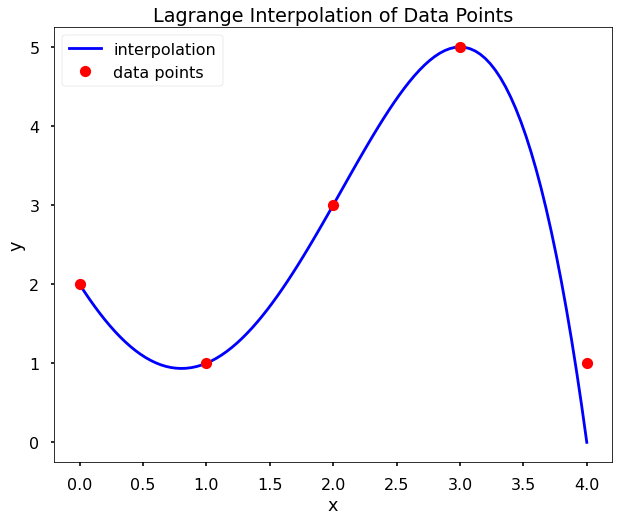

In [21]:
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

X = np.linspace(0, 4, 101)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), 'b', label = 'interpolation')
plt.plot(x, y, 'ro', label = 'data points')

plt.xlabel('x')
plt.ylabel('y')

plt.title(f'Lagrange Interpolation of Data Points')
plt.legend()
plt.show()

## **Section 17.5 Newton Polynomial Interpolation**
---
Similar to Lagrange Polynomial Interpolation, another method which unites the estimation into a single polynomial is the Newton Polynomial Interpolation process. Given 'n' data points will yield a polynomial of the 'n-1' order. The polynomial is expressed as the summation:

f(x) = a0 + a1(x - x0) + a2(x - x0)(x - x1) + a3(x - x0)(x - x1)(x - x2) + ... + an(x - x0)(x - x1)...(x - xn)

The main advantage to Newton Polynomial Interpolation is that it utilizes a technique known as divided differences. This pattern is born from the process to find each parameter a. Since each data point must be passed through:

f(x0) = a0 = y0

Then, by solving for the parameters:

a1 = (y1 - y0)/(x1 - y0)

a2 = ((y2 - y1)/(x2 - x1) - (y1 - y0)/(x1 - x0)) / (x2 - x0)

and so on. Note that more complicated parameters are comprised of the lower level calculations.

Unfortunately, this iterative process can become quite taxing as more and more data points are used in evaluating the interpolation function f(x). Thus it becomes convenient to rely on a computer to perform out the calculations.



**NOTE:** The code below is supplied by the MAT421 textbook *Python Programming and Numerical Methods - A Guide for Engineers and Scientists Methods*, whose copyright belongs to *Elsevier*. Additionally, the code was accessed through *https://pythonnumericalmethods.berkeley.edu/*

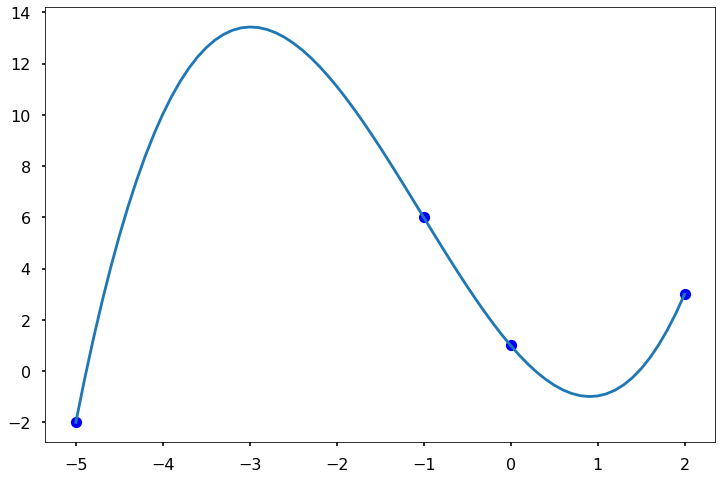

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

Notice that the above code breaks apart the tasks needed to be performed by the Newton method into smaller functions.